In [1]:
import pandas as pd
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import re
from nltk import word_tokenize

In [2]:
Tweets_train   = pd.DataFrame()
Articles_train = pd.DataFrame()
Blogs_train    = pd.DataFrame()
backup_train   = pd.DataFrame()
#Openion_train  = pd.DataFrame(index=['Opi'])

Extraction and Cleaning of Twitter Tweets

In [3]:
n1=['00']
#n1=['00']
Pre1 = "tweets_train_"
Suf1 = ".csv"
l1 = len(n1)
Tweet_file_list = []

for i1 in range(0,l1):
    Tweet_file_list.append(str(Pre1+n1[i1]+Suf1))

Tweet_file_cnt=len(Tweet_file_list)
for i in range(0,Tweet_file_cnt):
    read_media=pd.read_csv(Tweet_file_list[i],encoding='utf_8')
    Tweets_train=Tweets_train.append(read_media,ignore_index=True)

print(len(Tweets_train))
######################################################
n2=['00']
#n2=['00']
Pre2 = "Modi_articles_"
Suf2 = ".csv"
l2 = len(n2)
Article_file_list = []

for i in range(0,l2):
    Article_file_list.append(str(Pre2+n2[i]+Suf2))  

Article_file_cnt=len(Article_file_list)
for i in range(0,Article_file_cnt):
    read_Articles=pd.read_csv(Article_file_list[i],encoding='utf_8')
    Articles_train=Articles_train.append(read_Articles,ignore_index=True)
print(len(Articles_train))
###################################################  indiatoday_blogs_26
#n2=['01','02','03','04']
n3=['00']
#n3=['00']
Pre3 = "indiatoday_blogs_"
Suf3 = ".csv"
l3 = len(n3)
Blogs_file_list = []

for i in range(0,l3):
    Blogs_file_list.append(str(Pre3+n3[i]+Suf3))  

Blogs_file_cnt=len(Blogs_file_list)
for i in range(0,Blogs_file_cnt):
    read_Blogs=pd.read_csv(Blogs_file_list[i],encoding='utf_8')
    Blogs_train=Blogs_train.append(read_Blogs,ignore_index=True)
print(len(Blogs_train))
###################################################

20
600
19


In [4]:
combine_train= pd.concat([Tweets_train['Tweet'], Articles_train['content'],Blogs_train['Reviews']],ignore_index=True)
Data_train=pd.DataFrame(data=combine_train,columns=['Opinion'])

In [5]:
backup_train = Data_train
print(len(Data_train['Opinion']))

639


In [6]:
#Data_train = backup_train

In [7]:
backup_train['Opinion']

0      PM Modi - Mitro please stop open defecation, w...
1      Modi - Say no child labour. Every child must g...
2      #WATCH Prime Minister Narendra Modi at Bogibee...
3      RT @KanchanGupta: "NaMo fans find it hard to r...
4      RT @vinayak_jain: The head of the ISIS module ...
5      @RanjitOne There is a photo showing Modi doing...
6      RT @chilledharry211: Shiv Sena Slams PM Modi F...
7      RT @Hanzalamalik82: Best moment of 2018 is PM ...
8      RT @ttindia: “Vanakam Puducherry! That’s NoMo’...
9      RT @TimesNow: New Delhi: Telangana CM K. Chand...
10     RT @alamgirizvi: Modi apne kamaal bata rhe hai...
11     RT @retheeshraj10: "Modi-Ji, Forget Bullet Tra...
12     RT @swatisingh1995: An African professor once ...
13     RT @akshaychanders: NDTV logic to target PM mo...
14     RT @amitmalviya: On the day Prime Minister Mod...
15     RT @bithika11: Omg 🤦🏻‍♀️🤦🏻‍♀️🤦🏻‍♀️. Bewakoofi ...
16     RT @pbhushan1: Read: An interesting way to pre...
17     RT @keshavyadaviyc: ब्लॉ

In [8]:
Data_train.drop_duplicates(inplace=True)
print(len(Data_train['Opinion']))
Data_train.dropna(inplace=True)
print(len(Data_train['Opinion']))

627
626


Data Cleaning of Tweets Extracted from Twitter

In [9]:
def trans_lang(text):
    lang = Tweet.detect_language()
    if lang == 'en':
        pass
    else:
        try:
            text = Tweet.translate(to='en',)
        except Exception as e:
            print(e)
            

In [10]:
def cleanText(text):
    # remove url from Tweet    
    urlpat  = re.compile('http[s]?://(?:[a-zA-Z/.]|[0-9]|[$-_@.&+] | [!*\(\), ]|(?:%[0-9a-fA-F]{2}))+')
    text = re.sub(urlpat,'',text)
    # remove user infor at the begining of Tweet
    text = re.sub('\ART @[A-Za-z0-9_$&?]+:','',text)
    text = re.sub('\A[@#][A-Za-z0-9_$&?]+:','',text)
    # Remove emojis from Tweet
    emoji_char = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
    text=emoji_char.sub(r'',text)
    #remove carriage return and new line characters and insert multiple space to avoid word merge
    text = re.sub('[\\r\\n]','   ',text)
    # Clenaing article extensions like [+710 chars]
    text = re.sub('(\[\+([0-9]+) chars\])','',text)
    # Retain only space and characters as cleaned text
    text = re.sub('[^ a-zA-Z]','',text)
    # Replace muletiple spaces with single space
    text = re.sub(r' +', ' ', text)
    return text

wnl = WordNetLemmatizer()
def lemmatizeSentences(data):
    count = 0
    for text in data:
        # clean the text
        text = cleanText(text)
        sentence = ""
        for i, j in pos_tag(word_tokenize(text)):
            word = ''
            if j[0].lower() in ['n', 'v', 'r']:
                word = wnl.lemmatize(i, j[0].lower())
            elif j[0].lower() is 'j':
                word = wnl.lemmatize(i, 'a')
            else:
                word = wnl.lemmatize(i)
            sentence = sentence + " " + word.lower()
           
        word_check = word_tokenize(sentence)
        check_flag=""
        word_replaced = ""
        if (len(word_check)==1):
            word_replaced = word_check[0]
           
            check_flag = re.sub('[ ]+[!?a-zA-Z0-9]','',word_check[0])
            if check_flag != "":
                data[count] = sentence
                
                count = count + 1
            else:
                print(word_replaced)
                print('this is null')          
        else:
            data[count] = sentence
            count = count + 1 
            
    return data

In [11]:
Data_train['Opinion']=lemmatizeSentences(Data_train['Opinion'])

Extraction and Cleaning of Articles from Various Source: (TOI API)

In [12]:
data_len=len(Data_train['Opinion'])

In [13]:
Data_train.dropna(inplace=True)
print(len(Data_train['Opinion']))
Data_train = Data_train[Data_train.Opinion != '']
print(len(Data_train))
Data_train = Data_train.reset_index(drop=True)

626
625


In [14]:
Data_train.to_csv("combined_10.csv",index=False,encoding='utf_8')

In [15]:
Data_train['Polarity']=0.0
Data_train['Subjectivity']=0.0
Data_train['Sentiment']='Unclassify'

In [16]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

C:\Users\Rohan\Anaconda2\envs\py36\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [17]:
### Sentiment Analysis Processing  ###
data_len = data_len-1
i = -1
Polarity=[]
Subjectivity=[]
while i < data_len:
    i += 1
    try:
        Tweet = TextBlob(Data_train['Opinion'][i])
        #Tweet = Tweet.trans_lang()                    # there is per day restrictions to call this
        #Polarity.append(Tweet.sentiment.polarity)
        #Subjectivity.append(Tweet.sentiment.subjectivity)
        Data_train['Polarity'][i] = Tweet.sentiment.polarity
        Data_train['Subjectivity'][i] = Tweet.sentiment.subjectivity
        if Tweet.sentiment.polarity  < 0.0:
            Data_train['Sentiment'][i]='Negative'
        else:
            if Tweet.sentiment.polarity  > 0.0:
                Data_train['Sentiment'][i]='Positive'
            else:
                Data_train['Sentiment'][i]='Neutral'
            
            
            
    except Exception as e:
        pass   
#Data_train['Polarity'] = Polarity
#Data_train['Subjectivity'] = Subjectivity

C:\Users\Rohan\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\Rohan\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Rohan\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Rohan\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.

In [21]:
backup_Train = Data_train

In [22]:
Data_train.to_csv("Modi_Popularity11.csv",encoding='utf_8')

In [23]:
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.naive_bayes import MultinomialNB
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as plt 
from textblob.classifiers import NaiveBayesClassifier
from wordcloud import WordCloud,STOPWORDS

In [24]:
neg_len = len(Data_train[Data_train.Sentiment == 'Negative'])
pos_len = len(Data_train[Data_train.Sentiment == 'Positive'])
Total_len = neg_len+pos_len
neg_pol = (neg_len/Total_len)*100
pos_pol = (pos_len/Total_len)*100
print("Opinion Strength: based on sentence level polarity, together with Historical Data")
print("In favour of Modi:", pos_pol)
print("Aganst Modi:", neg_pol)

Opinion Strength: based on sentence level polarity, together with Historical Data
In favour of Modi: 67.74193548387096
Aganst Modi: 32.25806451612903


In [25]:
vectorizer = CountVectorizer(min_df = 0.01, max_df= 0.99, stop_words="english")
vfeatures = pd.DataFrame(vectorizer.fit_transform(Data_train['Opinion']).toarray(),columns=vectorizer.get_feature_names())
X_vtrain, X_vtest, y_vtrain, y_vtest = train_test_split(vfeatures, Data_train['Sentiment'],test_size=0.30)
vcols  = vectorizer.get_feature_names()
vec_uniq_cols = vectorizer.fit_transform(Data_train['Opinion'])
vgnb = MultinomialNB()
vy_pred = vgnb.fit(X_vtrain, y_vtrain)
gvpred = vy_pred.predict(X_vtest)
vy_pred.score(X_vtest,y_vtest)

0.4787234042553192

In [26]:
Op_train = pd.DataFrame(shuffle(Data_train))
Op_train = Op_train.reset_index(drop=True)

In [27]:
len1 = len(Op_train)
trlen = round(len1*0.70)
print(round(trlen))

438


In [29]:
def category(cat):
    if cat =='Positive':
        return 0
    if cat =='Negative':
        return 1
    if cat =='Neutral':
        return 2
Op_train['senti_score'] = Op_train['Sentiment'].apply(category)

In [30]:
Op_train['senti_score'] = pd.to_numeric(Op_train['senti_score'])

In [32]:
Modi_senti=[]
for i in range(0,trlen):
    Modi_senti.append((Op_train['Opinion'][i],Op_train['senti_score'][i]))
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(Modi_senti)

In [33]:
vectorizer = CountVectorizer(min_df = 0.01, max_df= 0.95, stop_words="english")
vec_uniq_cols = vectorizer.fit_transform(Op_train['Opinion'])
#vcols  = vectorizer.get_feature_names()
vfeatures = pd.DataFrame(vectorizer.fit_transform(Op_train['Opinion']).toarray(),columns=vectorizer.get_feature_names())
X_vtrain, X_vtest, y_vtrain, y_vtest = train_test_split(vfeatures, Op_train['Sentiment'],test_size=0.30)

In [34]:
def printwordcloud(text,stopwords):
    wordcloud = WordCloud(width = 800,
                      height = 800,
                      background_color ='white',
                      stopwords = stopwords).generate(text) 
                      
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
  
    plt.show() 

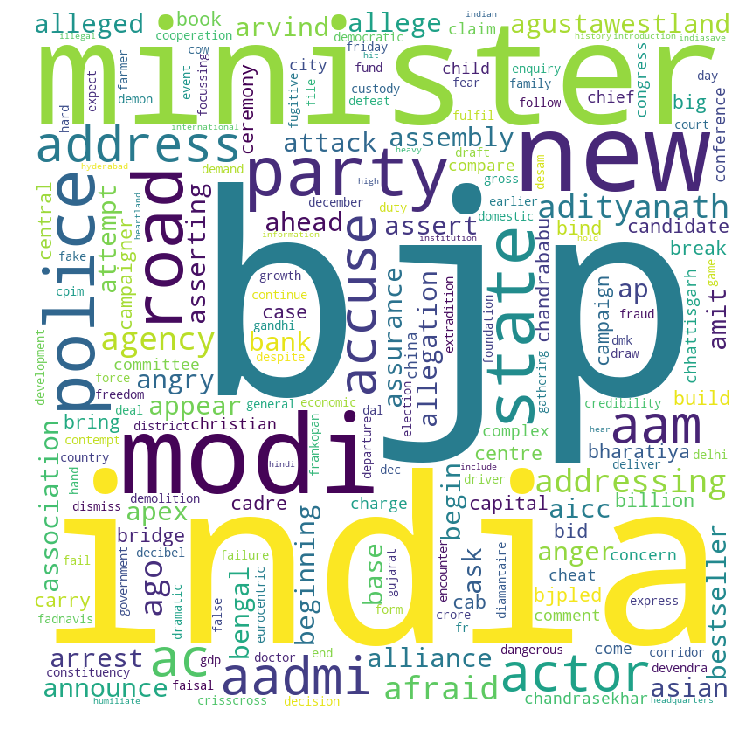

In [35]:
Data_neg_train = Data_train[Data_train.Sentiment == 'Negative']
vectorizer = CountVectorizer(min_df = 0.01, max_df= 0.95, stop_words="english")
vec_uniq_cols = vectorizer.fit_transform(Data_neg_train['Opinion'])
vcols  = vectorizer.get_feature_names()
comment_words = ' '
stopwords = set(STOPWORDS) 
text= " ".join(review for review in vcols)
len(text)
stopwords.update(['chars','https','RT','sunday','monday','amp','ndtv','hai','foreign','mr','said',
                 'isis','say','ji'])
printwordcloud(text,stopwords)

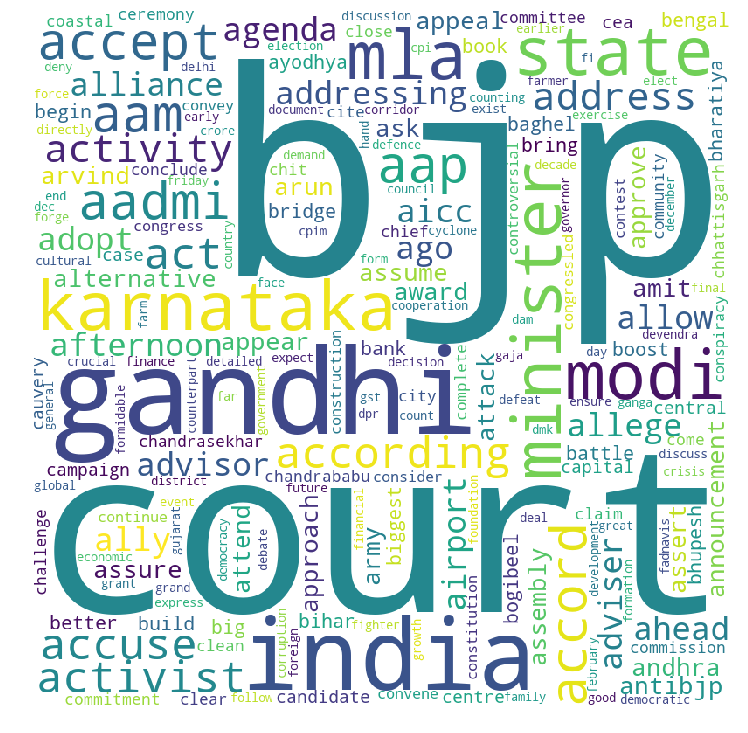

In [36]:
Data_pos_train = Data_train[Data_train.Sentiment == 'Positive']
vectorizer = CountVectorizer(min_df = 0.01, max_df= 0.95, stop_words="english")
vec_uniq_cols = vectorizer.fit_transform(Data_pos_train['Opinion'])
vcols  = vectorizer.get_feature_names()
comment_words = ' '
stopwords = set(STOPWORDS) 
text= " ".join(review for review in vcols)
len(text)
stopwords.update(['chars','https','RT','sunday','monday','amp'])
printwordcloud(text,stopwords)